In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


In [2]:
names=['title','text','subject','date']
df_fake = pd.read_csv("Fake75.csv",usecols=names)
df_true = pd.read_csv("True75.csv",encoding='latin1')

In [3]:
df_fake.head(5)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [4]:
df_true.head(5)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape, df_true.shape


((33886, 5), (31752, 5))

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(33885,33875,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(31751,31741,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape


((33876, 5), (31742, 5))

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-9-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-9-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [10]:
df_fake_manual_testing.head(10)


,title,text,subject,date,class
33876,"Samsung, Kim Jong-un, Rex Tillerson: Your Morn...",Good morning. Here’s what you need to know: •...,Politics,12-Oct-16,0
33877,Ann Coulter: How to Provide Universal Health C...,The first sentence of Congress’ Obamacare repe...,Politics,12-Oct-16,0
33878,Sally Yates Won’t Say If Trump Was Wiretapped ...,Former Deputy Attorney General Sally Yates dec...,Politics,12-Oct-16,0
33879,Sen. McConnell: The Supreme Court Vacancy Was ...,"Senate Majority Leader Mitch McConnell (R, KY)...",Politics,12-Oct-16,0
33880,Nikki Haley Blasts U.N. Human Rights Office fo...,U. S Ambassador to the United Nations Nikki Ha...,Politics,12-Oct-16,0
33881,"Jakarta Bombing Kills Three Police Officers, L...",Two suicide bombers attacked a bus station in ...,Politics,12-Oct-16,0
33882,Trump: Putin ’Very Smart’ to Not Retaliate ove...,Donald Trump took to Twitter Friday to praise ...,Politics,12-Oct-16,0
33883,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,Politics,12-Oct-16,0
33884,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,Politics,12-Oct-16,0
33885,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,Politics,12-Oct-16,0


In [11]:
df_true_manual_testing.head(10)


,title,text,subject,date,class
31742,Australia to hunt down anti-vax nurses and pro...,Trumpâs Opponents See Normal Americans as De...,article,22-Aug-17,1
31743,How this WWII airman is helping veterans heal ...,Drug and substance abuse has ruined and taken ...,article,22-Aug-17,1
31744,Trump Campaign Says Hillary Supporter Tried As...,Doctors prescribe deadly opioid for pain-relat...,article,22-Aug-17,1
31745,Editor of Austriaâs Largest Paper Charged wi...,The forgotten man decided the presidential ele...,article,22-Aug-17,1
31746,Time is Running Out to Stop Kratom Ban â Nee...,Chart Of The Day: Restaurant Performance Index...,article,22-Aug-17,1
31747,The Fix Is In: NBC Affiliate Accidentally Post...,By Brandon Turbeville Anti-fluoridation activi...,article,22-Aug-17,1
31748,Comment on World Heaves Sigh of Relief after T...,Osama bin Ladenâs older brother rents out lu...,article,22-Aug-17,1
31749,Government Forces Advancing at Damascus-Aleppo...,source Add To The Conversation Using Facebook ...,article,22-Aug-17,1
31750,Maineâs Gov. LePage Threatens To âInvestig...,Home âº POLITICS | US NEWS âº HUMA ABEDIN SW...,article,22-Aug-17,1
31751,Lawyer Who Kept Hillary Campaign Chief Out of ...,DYN's Statement on Last Week's Botnet Attack h...,article,22-Aug-17,1


In [12]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing75.csv")

In [13]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,25-Dec-17,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,23-Dec-17,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,23-Dec-17,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,22-Dec-17,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,21-Dec-17,0


In [14]:
df_marge.columns


Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
df = df_marge.drop(["title", "subject","date"], axis = 1)


In [16]:
df.isnull().sum()


text     0
class    0
dtype: int64

In [17]:
df = df.sample(frac = 1)


In [18]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [19]:
df.columns


Index(['text', 'class'], dtype='object')

In [20]:
df.head()


,text,class
0,WASHINGTON (Reuters) - U.S. Vice President Joe...,1
1,BERLIN (Reuters) - Wolfgang Schaeuble s decisi...,1
2,This Barack Obama-Eric Holder inspired anti-Am...,0
3,Donald Trump will explode when he reads this.T...,0
4,"In Hillary's America, email server scrubs you ...",1


In [21]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [22]:
df["text"] = df["text"].apply(wordopt)


In [23]:
x = df["text"]
y = df["class"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [26]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [27]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = SVC()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, sclf], 
                      ['SVC',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, xv_train, y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.96 (+/- 0.00) [SVC]
Accuracy: 0.96 (+/- 0.00) [StackingClassifier]


In [28]:
sclf.fit(xv_train, y_train)
pred_dt = sclf.predict(xv_test)

In [29]:
sclf.score(xv_test, y_test)


0.9703748857055776

In [30]:
print(classification_report(y_test, pred_dt))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8521
           1       0.98      0.96      0.97      7884

    accuracy                           0.97     16405
   macro avg       0.97      0.97      0.97     16405
weighted avg       0.97      0.97      0.97     16405



In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_dt)
print(cm)

[[8341  180]
 [ 306 7578]]


In [32]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("confusion matrix, without normalization")
  print(cm)
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

confusion matrix, without normalization
[[8341  180]
 [ 306 7578]]


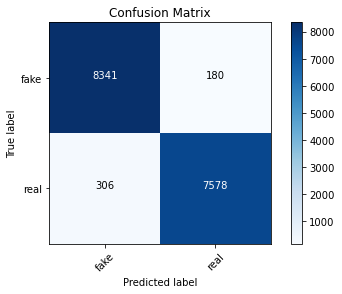

In [33]:
cm_plot_labels = ["fake","real"]
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

In [34]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_sclf = sclf.predict(new_xv_test)
    pro=sclf.predict_proba(new_xv_test)
    #print(pro[0]," ",pro[1])
    #print(pro[0][1])
   # print(pred_sclf[1])
    return print("\nThe given news is :{} % percentage is : {}\n".format((pro[0][pred_sclf[0]]*100),output_lable(pred_sclf[0])))

In [35]:
news = str(input())
manual_testing(news)

 Trump Said Some INSANELY Racist Stuff Inside The Oval Office, And Witnesses Back It Up

The given news is :99.26948810556094 % percentage is : Fake News

